# 🧠 Tokenization Comparison: Hugging Face vs OpenAI's tiktoken

This project benchmarks and compares tokenization systems from **Hugging Face** and **OpenAI’s tiktoken**. It analyzes token counts, encoding/decoding speed, token length statistics, reconstruction fidelity, and more — helping you make informed choices about which tokenizer to use for different NLP or LLM-based applications.

---

## 📌 Features

- 🔍 Compares **token count**, **token lengths**, and **vocabulary size**
- ⚡ Measures **encoding and decoding speed**
- 📉 Analyzes **compression ratio** (characters per token)
- ✅ Evaluates **text reconstruction accuracy**
- 📊 Generates **visualizations** and **report files** for deeper analysis

---

## 🧾 Contents

```
├── article.txt                # Input text file (your raw text for tokenization)
├── tokenizer.txt             # Hugging Face tokenizer analysis results (JSON)
├── tiktoken.txt              # tiktoken tokenizer analysis results (JSON)
├── comparison_report.txt     # Human-readable comparison report (Markdown)
├── token_count_comparison.png # Bar chart comparing token counts
├── tokenizer_comparison.ipynb # Main notebook (run this)
├── README.md                 # You're here!
```

---

## 🛠️ Setup

### 1. Clone the repository or download the notebook

```bash
git clone https://github.com/yourusername/tokenizer-comparison
cd tokenizer-comparison
```

Or open the `.ipynb` file in [Google Colab](https://colab.research.google.com/) or Jupyter.

### 2. Install required dependencies

Inside the notebook or your Python environment:

```bash
pip install transformers tiktoken matplotlib seaborn pandas
```

### 3. Prepare your input

Add a text file named `article.txt` in the working directory.  
If not found, a default sample will be generated.

---

## 🚀 How to Run

1. Launch `tokenizer_comparison.ipynb` in Colab or Jupyter Notebook.
2. It will:
   - Load your `article.txt`
   - Analyze tokenization using Hugging Face and tiktoken
   - Save results into `tokenizer.txt`, `tiktoken.txt`, and `comparison_report.txt`
   - Generate visual comparison chart(s)
3. Final insights and recommendations will be written to `comparison_report.txt`.

---

## 📈 Example Output

- **tokenizer.txt**: Metrics like token counts, sentence counts, average token length, most common tokens, etc.
- **tiktoken.txt**: Similar stats but using `tiktoken` tokenizer.
- **comparison_report.txt**: A human-friendly Markdown report summarizing the key differences.
- **token_count_comparison.png**: A bar graph comparing total tokens produced by each tokenizer.

---

## 🧪 Supported Tokenizers

### Hugging Face
- Uses `transformers.AutoTokenizer` (default: `bert-base-uncased`)
- Can be changed via function parameter: `analyze_hf_tokenizer(text, tokenizer_name='your-model')`

### OpenAI's tiktoken
- Uses `tiktoken.get_encoding('cl100k_base')`
- Can be changed via function parameter: `analyze_tiktoken(text, encoding_name='your-encoding')`

---

## 📊 Sample Metrics Analyzed

| Metric                     | Description                                              |
|---------------------------|----------------------------------------------------------|
| `total_tokens`            | Number of tokens produced                                |
| `encoding_time_seconds`   | Time to tokenize input                                   |
| `decoding_time_seconds`   | Time to reconstruct text from token IDs                  |
| `avg_token_length`        | Average characters per token                             |
| `compression_ratio`       | Characters per token (lower = more efficient)            |
| `reconstruction_accuracy` | Whether decoding matches original input exactly          |
| `most_common_tokens`      | Top 10 most frequently occurring tokens                  |

---

## 📌 Why Compare?

| Use Case                  | Suggested Tokenizer |
|--------------------------|---------------------|
| Speed-critical apps       | `tiktoken`          |
| Token-efficiency (e.g., OpenAI API cost) | `tiktoken`  |
| Wider model support       | `Hugging Face`      |
| Interpretability & debugging | `Hugging Face`  |

---

## 🧠 Author & Credits

- Developed by [Avrodeep Pal]
- Uses [Hugging Face Transformers](https://huggingface.co/docs/transformers/index) and [tiktoken](https://github.com/openai/tiktoken)
- Visualization with `matplotlib` & `seaborn`

---

## 📄 License

MIT License. Feel free to use, modify, and share!

---

Checking for article.txt...
article.txt found!
Article length: 6589 characters
First 100 characters: How Far We've Come: The Power and Promise of Large Language Models
Large Language Models (LLMs) have...

===== Starting tokenization analysis =====

--- Analyzing text with bert-base-uncased tokenizer ---
Loading bert-base-uncased...


Token indices sequence length is longer than the specified maximum sequence length for this model (1398 > 512). Running this sequence through the model will result in indexing errors


Detected 80 sentences
Analysis complete. Results saved to tokenizer.txt
Total tokens: 1398
Encoding time: 0.0223 seconds
Reconstruction accurate: False

--- Analyzing text with tiktoken (cl100k_base) ---
Loading cl100k_base...
Detected 80 sentences
Analysis complete. Results saved to tiktoken.txt
Total tokens: 1341
Encoding time: 0.0033 seconds
Reconstruction accurate: True

--- Comparing tokenizers ---


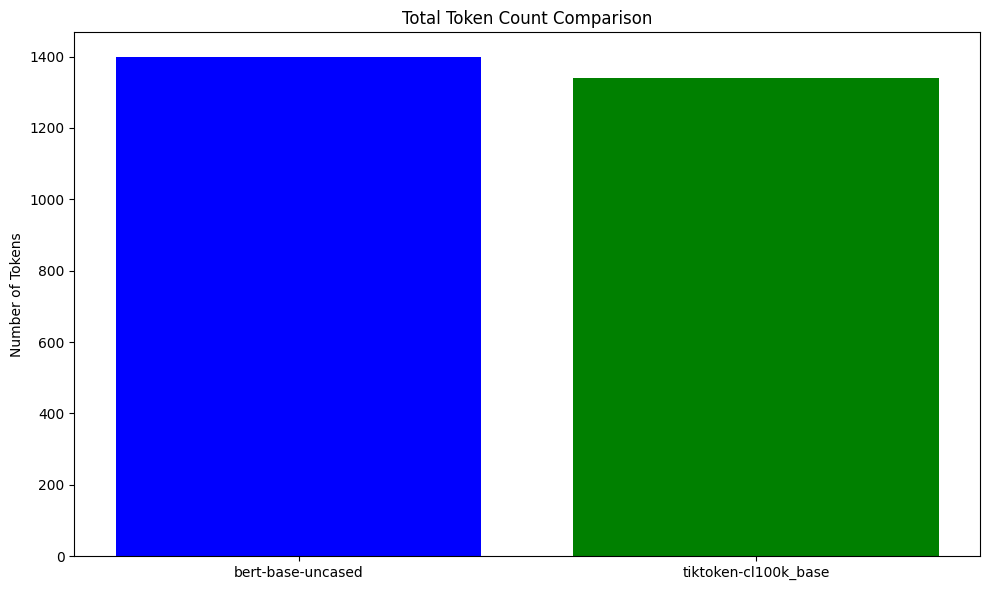

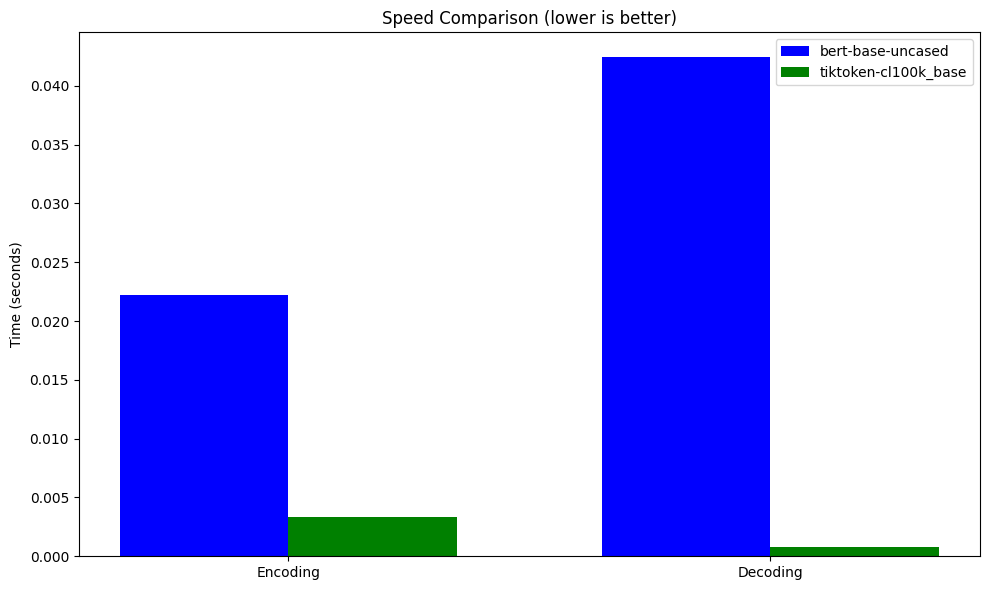

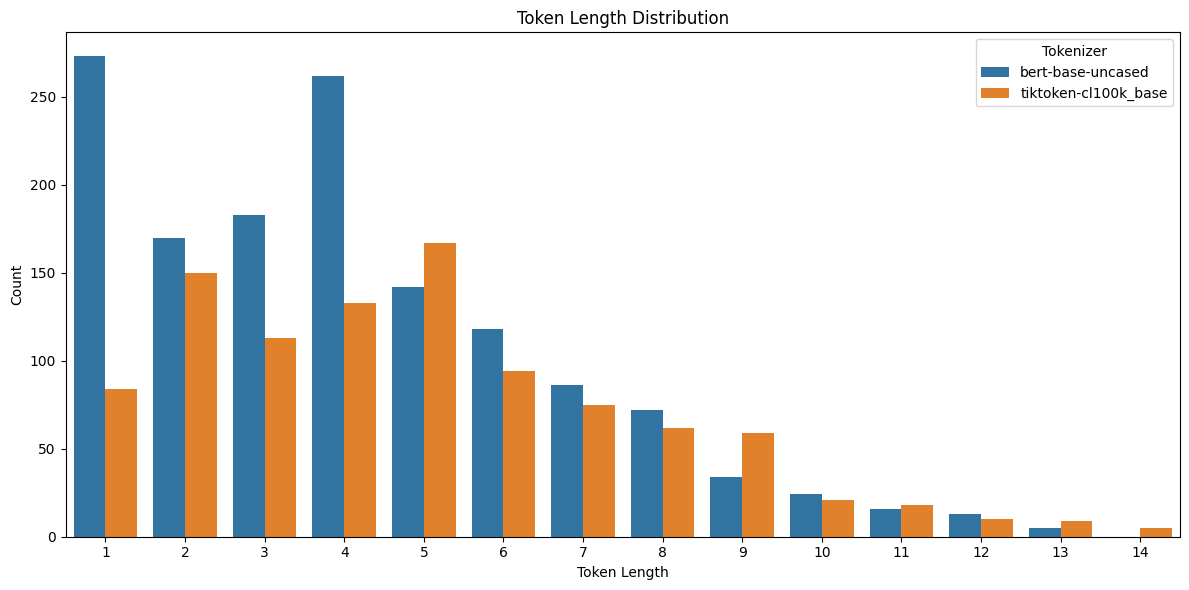

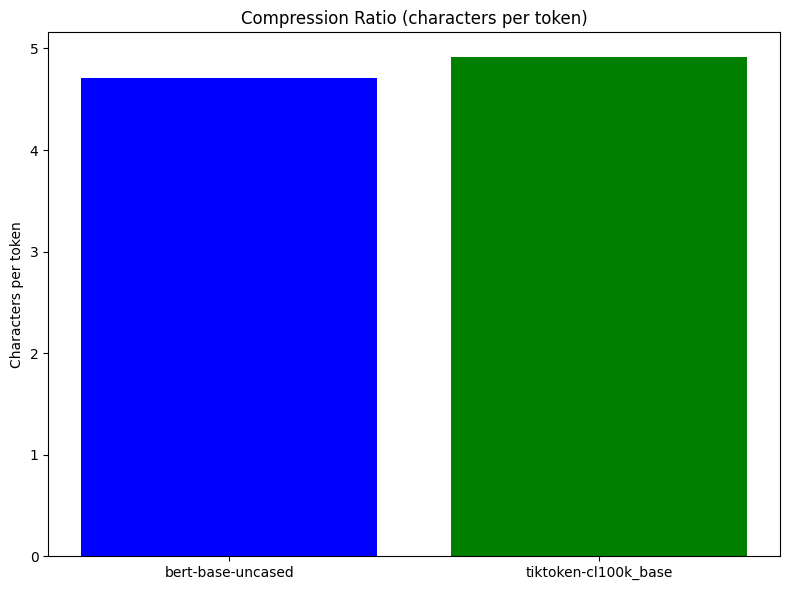


Comparison complete!
Text report saved to comparison_report.txt
Visual comparisons saved as PNG files and displayed in notebook


--- CONCLUSION ---
# Tokenizer Comparison Report

## Token Count Comparison
The Hugging Face tokenizer (bert-base-uncased) produced 57 more tokens than tiktoken (tiktoken-cl100k_base). This represents a 4.25% increase.

## Speed Comparison
Hugging Face is 6.70x faster at encoding than tiktoken.
Hugging Face is 56.73x faster at decoding than tiktoken.

## Compression Comparison
tiktoken achieves better compression with 4.91 characters per token versus Hugging Face's 4.71.

## Token Length Comparison
Average token length: Hugging Face = 4.11 characters, tiktoken = 4.92 characters.

## Reconstruction Accuracy
Hugging Face reconstruction accurate: False
tiktoken reconstruction accurate: True

## Use Case Recommendations
- For speed-critical applications, Hugging Face is preferable.
- For applications where token count matters (e.g., API pricing), tiktoken produ

In [ ]:
# Tokenization Comparison: Hugging Face vs OpenAI's tiktoken
# This notebook tokenizes text using both systems and compares their performance

# Enable inline plotting for Colab
%matplotlib inline

# Install required packages
!pip install transformers tiktoken matplotlib seaborn pandas

# Import necessary libraries
import os
import json
import time
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer
import tiktoken
from collections import Counter

# Simple sentence tokenizer (to avoid NLTK dependency issues)
def simple_sent_tokenize(text):
    # This is a very simple sentence tokenizer that splits on .!? followed by space or newline
    sentences = re.split(r'[.!?][\s\n]+', text)
    # Filter out empty sentences
    sentences = [s for s in sentences if s.strip()]
    return sentences

# Check if article.txt exists
print("Checking for article.txt...")
if not os.path.exists('article.txt'):
    print("Warning: article.txt not found. Please upload your text file.")
    # Create a sample file for testing if needed
    with open('article.txt', 'w') as f:
        f.write("This is a sample text. Please replace with your actual article by uploading article.txt.")
else:
    print("article.txt found!")

# Read the article file
with open('article.txt', 'r', encoding='utf-8') as f:
    article_text = f.read()

print(f"Article length: {len(article_text)} characters")
print(f"First 100 characters: {article_text[:100]}...")

# --------------- MODULE 1: HUGGING FACE TOKENIZER ANALYSIS ---------------

def analyze_hf_tokenizer(text, tokenizer_name="bert-base-uncased"):
    print(f"\n--- Analyzing text with {tokenizer_name} tokenizer ---")

    # Initialize tokenizer
    print(f"Loading {tokenizer_name}...")
    tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)

    # Calculate sentences using our simple tokenizer instead of NLTK
    sentences = simple_sent_tokenize(text)
    num_sentences = len(sentences)
    print(f"Detected {num_sentences} sentences")

    # Start timing
    start_time = time.time()

    # Tokenize
    tokens = tokenizer.tokenize(text)
    token_ids = tokenizer.encode(text)

    # Calculate encoding time
    encoding_time = time.time() - start_time

    # Decode back
    start_time = time.time()
    decoded_text = tokenizer.decode(token_ids, skip_special_tokens=True)
    decoding_time = time.time() - start_time

    # Calculate metrics
    total_tokens = len(tokens)
    vocab_size = len(tokenizer.get_vocab())
    avg_tokens_per_sentence = total_tokens / num_sentences if num_sentences > 0 else 0
    reconstruction_accuracy = (decoded_text == text)
    compression_ratio = len(text) / len(token_ids)

    # Token length distribution
    token_lengths = [len(token) for token in tokens]
    avg_token_length = sum(token_lengths) / len(token_lengths) if token_lengths else 0

    # Token frequency analysis
    token_counter = Counter(tokens)
    most_common_tokens = token_counter.most_common(10)

    # Character distribution in tokens
    char_distribution = Counter(''.join(tokens))

    # Create results dictionary
    results = {
        "tokenizer_name": tokenizer_name,
        "total_tokens": total_tokens,
        "vocabulary_size": vocab_size,
        "unique_tokens": len(set(tokens)),
        "num_sentences": num_sentences,
        "avg_tokens_per_sentence": avg_tokens_per_sentence,
        "encoding_time_seconds": encoding_time,
        "decoding_time_seconds": decoding_time,
        "reconstruction_accuracy": reconstruction_accuracy,
        "compression_ratio": compression_ratio,
        "avg_token_length": avg_token_length,
        "most_common_tokens": [(token, count) for token, count in most_common_tokens],  # Convert to list of tuples for JSON
        "token_list": tokens[:1000],  # First 1000 tokens to avoid huge files
        "token_ids": token_ids[:1000],  # First 1000 IDs
        "token_length_distribution": {str(k): v for k, v in Counter(token_lengths).items()},  # Convert keys to strings for JSON
    }

    # Write results to file
    with open('tokenizer.txt', 'w', encoding='utf-8') as f:
        json.dump(results, f, indent=2, ensure_ascii=False)

    print(f"Analysis complete. Results saved to tokenizer.txt")
    print(f"Total tokens: {total_tokens}")
    print(f"Encoding time: {encoding_time:.4f} seconds")
    print(f"Reconstruction accurate: {reconstruction_accuracy}")

    return results

# --------------- MODULE 2: TIKTOKEN ANALYSIS ---------------

def analyze_tiktoken(text, encoding_name="cl100k_base"):
    print(f"\n--- Analyzing text with tiktoken ({encoding_name}) ---")

    # Initialize tokenizer
    print(f"Loading {encoding_name}...")
    encoder = tiktoken.get_encoding(encoding_name)

    # Calculate sentences - use our simple tokenizer
    sentences = simple_sent_tokenize(text)
    num_sentences = len(sentences)
    print(f"Detected {num_sentences} sentences")

    # Start timing
    start_time = time.time()

    # Tokenize
    token_ids = encoder.encode(text)

    # Calculate encoding time
    encoding_time = time.time() - start_time

    # Decode back
    start_time = time.time()
    decoded_text = encoder.decode(token_ids)
    decoding_time = time.time() - start_time

    # Get token strings - for the first 1000 tokens only to avoid performance issues
    tokens = [encoder.decode([id]) for id in token_ids[:1000]]

    # Calculate metrics
    total_tokens = len(token_ids)
    vocab_size = encoder.n_vocab if hasattr(encoder, 'n_vocab') else None
    avg_tokens_per_sentence = total_tokens / num_sentences if num_sentences > 0 else 0
    reconstruction_accuracy = (decoded_text == text)
    compression_ratio = len(text) / len(token_ids)

    # Token length distribution (only for the sample we decoded)
    token_lengths = [len(token) for token in tokens]
    avg_token_length = sum(token_lengths) / len(token_lengths) if token_lengths else 0

    # Token frequency analysis (on sample only)
    token_counter = Counter(tokens)
    most_common_tokens = token_counter.most_common(10)

    # Create results dictionary
    results = {
        "tokenizer_name": f"tiktoken-{encoding_name}",
        "total_tokens": total_tokens,
        "vocabulary_size": vocab_size,
        "unique_tokens": len(set(tokens)),  # This is only for the sample
        "num_sentences": num_sentences,
        "avg_tokens_per_sentence": avg_tokens_per_sentence,
        "encoding_time_seconds": encoding_time,
        "decoding_time_seconds": decoding_time,
        "reconstruction_accuracy": reconstruction_accuracy,
        "compression_ratio": compression_ratio,
        "avg_token_length": avg_token_length,
        "most_common_tokens": [(token, count) for token, count in most_common_tokens],  # Convert to list of tuples for JSON
        "token_sample": tokens[:100],  # Sample of tokens
        "token_ids": token_ids[:1000],  # First 1000 IDs
        "token_length_distribution": {str(k): v for k, v in Counter(token_lengths).items()},  # Convert keys to strings for JSON
    }

    # Write results to file
    with open('tiktoken.txt', 'w', encoding='utf-8') as f:
        json.dump(results, f, indent=2, ensure_ascii=False)

    print(f"Analysis complete. Results saved to tiktoken.txt")
    print(f"Total tokens: {total_tokens}")
    print(f"Encoding time: {encoding_time:.4f} seconds")
    print(f"Reconstruction accurate: {reconstruction_accuracy}")

    return results

# --------------- MODULE 3: COMPARATIVE ANALYSIS ---------------

def compare_tokenizers(hf_results, tiktoken_results):
    print("\n--- Comparing tokenizers ---")

    # Create comparison metrics
    comparison = {
        "total_tokens_comparison": {
            "huggingface": hf_results["total_tokens"],
            "tiktoken": tiktoken_results["total_tokens"],
            "difference": hf_results["total_tokens"] - tiktoken_results["total_tokens"],
            "ratio": hf_results["total_tokens"] / tiktoken_results["total_tokens"] if tiktoken_results["total_tokens"] > 0 else 0
        },
        "speed_comparison": {
            "huggingface_encoding": hf_results["encoding_time_seconds"],
            "tiktoken_encoding": tiktoken_results["encoding_time_seconds"],
            "encoding_speedup": tiktoken_results["encoding_time_seconds"] / hf_results["encoding_time_seconds"]
                if hf_results["encoding_time_seconds"] > 0 else 0,
            "huggingface_decoding": hf_results["decoding_time_seconds"],
            "tiktoken_decoding": tiktoken_results["decoding_time_seconds"],
            "decoding_speedup": tiktoken_results["decoding_time_seconds"] / hf_results["decoding_time_seconds"]
                if hf_results["decoding_time_seconds"] > 0 else 0
        },
        "compression_comparison": {
            "huggingface": hf_results["compression_ratio"],
            "tiktoken": tiktoken_results["compression_ratio"],
            "difference": hf_results["compression_ratio"] - tiktoken_results["compression_ratio"]
        },
        "token_length_comparison": {
            "huggingface_avg": hf_results["avg_token_length"],
            "tiktoken_avg": tiktoken_results["avg_token_length"],
            "difference": hf_results["avg_token_length"] - tiktoken_results["avg_token_length"]
        },
        "reconstruction_accuracy": {
            "huggingface": hf_results["reconstruction_accuracy"],
            "tiktoken": tiktoken_results["reconstruction_accuracy"]
        }
    }

    # Generate conclusion
    conclusion = []
    conclusion.append(f"# Tokenizer Comparison Report")
    conclusion.append(f"\n## Token Count Comparison")

    if comparison["total_tokens_comparison"]["difference"] > 0:
        conclusion.append(f"The Hugging Face tokenizer ({hf_results['tokenizer_name']}) produced {abs(comparison['total_tokens_comparison']['difference'])} " +
                         f"more tokens than tiktoken ({tiktoken_results['tokenizer_name']}). " +
                         f"This represents a {(comparison['total_tokens_comparison']['ratio'] - 1) * 100:.2f}% increase.")
    elif comparison["total_tokens_comparison"]["difference"] < 0:
        conclusion.append(f"The tiktoken tokenizer ({tiktoken_results['tokenizer_name']}) produced {abs(comparison['total_tokens_comparison']['difference'])} " +
                         f"more tokens than Hugging Face ({hf_results['tokenizer_name']}). " +
                         f"This represents a {(1 - comparison['total_tokens_comparison']['ratio']) * 100:.2f}% reduction for Hugging Face.")
    else:
        conclusion.append(f"Both tokenizers produced exactly the same number of tokens: {hf_results['total_tokens']}.")

    conclusion.append(f"\n## Speed Comparison")
    if comparison["speed_comparison"]["encoding_speedup"] > 1:
        conclusion.append(f"tiktoken is {comparison['speed_comparison']['encoding_speedup']:.2f}x faster at encoding than Hugging Face.")
    else:
        conclusion.append(f"Hugging Face is {1/comparison['speed_comparison']['encoding_speedup']:.2f}x faster at encoding than tiktoken.")

    if comparison["speed_comparison"]["decoding_speedup"] > 1:
        conclusion.append(f"tiktoken is {comparison['speed_comparison']['decoding_speedup']:.2f}x faster at decoding than Hugging Face.")
    else:
        conclusion.append(f"Hugging Face is {1/comparison['speed_comparison']['decoding_speedup']:.2f}x faster at decoding than tiktoken.")

    conclusion.append(f"\n## Compression Comparison")
    if comparison["compression_comparison"]["difference"] > 0:
        conclusion.append(f"Hugging Face achieves better compression with {comparison['compression_comparison']['huggingface']:.2f} " +
                         f"characters per token versus tiktoken's {comparison['compression_comparison']['tiktoken']:.2f}.")
    elif comparison["compression_comparison"]["difference"] < 0:
        conclusion.append(f"tiktoken achieves better compression with {comparison['compression_comparison']['tiktoken']:.2f} " +
                         f"characters per token versus Hugging Face's {comparison['compression_comparison']['huggingface']:.2f}.")
    else:
        conclusion.append(f"Both tokenizers achieve the same compression ratio: {comparison['compression_comparison']['huggingface']:.2f} characters per token.")

    conclusion.append(f"\n## Token Length Comparison")
    conclusion.append(f"Average token length: Hugging Face = {comparison['token_length_comparison']['huggingface_avg']:.2f} characters, " +
                     f"tiktoken = {comparison['token_length_comparison']['tiktoken_avg']:.2f} characters.")

    conclusion.append(f"\n## Reconstruction Accuracy")
    conclusion.append(f"Hugging Face reconstruction accurate: {hf_results['reconstruction_accuracy']}")
    conclusion.append(f"tiktoken reconstruction accurate: {tiktoken_results['reconstruction_accuracy']}")

    conclusion.append(f"\n## Use Case Recommendations")
    if comparison["speed_comparison"]["encoding_speedup"] > 1:
        conclusion.append(f"- For speed-critical applications, tiktoken is preferable.")
    else:
        conclusion.append(f"- For speed-critical applications, Hugging Face is preferable.")

    if comparison["total_tokens_comparison"]["ratio"] > 1:
        conclusion.append(f"- For applications where token count matters (e.g., API pricing), tiktoken produces fewer tokens.")
    else:
        conclusion.append(f"- For applications where token count matters (e.g., API pricing), Hugging Face produces fewer tokens.")

    # Write comparison to file
    with open('comparison_report.txt', 'w', encoding='utf-8') as f:
        f.write('\n'.join(conclusion))

    # Create visual comparisons
    # 1. Token count comparison
    plt.figure(figsize=(10, 6))
    labels = [hf_results["tokenizer_name"], tiktoken_results["tokenizer_name"]]
    values = [hf_results["total_tokens"], tiktoken_results["total_tokens"]]

    plt.bar(labels, values, color=['blue', 'green'])
    plt.title('Total Token Count Comparison')
    plt.ylabel('Number of Tokens')
    plt.tight_layout()
    plt.savefig('token_count_comparison.png')
    plt.show()  # Added to display in notebook
    plt.close()

    # 2. Speed comparison
    plt.figure(figsize=(10, 6))
    labels = ['Encoding', 'Decoding']
    hf_values = [hf_results["encoding_time_seconds"], hf_results["decoding_time_seconds"]]
    tiktoken_values = [tiktoken_results["encoding_time_seconds"], tiktoken_results["decoding_time_seconds"]]

    x = np.arange(len(labels))
    width = 0.35

    plt.bar(x - width/2, hf_values, width, label=hf_results["tokenizer_name"], color='blue')
    plt.bar(x + width/2, tiktoken_values, width, label=tiktoken_results["tokenizer_name"], color='green')

    plt.title('Speed Comparison (lower is better)')
    plt.ylabel('Time (seconds)')
    plt.xticks(x, labels)
    plt.legend()
    plt.tight_layout()
    plt.savefig('speed_comparison.png')
    plt.show()  # Added to display in notebook
    plt.close()

    # 3. Token length distribution
    try:
        plt.figure(figsize=(12, 6))

        # Prepare data for token length distribution
        # This is a bit tricky because the keys are strings now
        hf_lengths = sorted([int(k) for k in hf_results["token_length_distribution"].keys()])
        hf_counts = [hf_results["token_length_distribution"][str(k)] for k in hf_lengths]

        tiktoken_lengths = sorted([int(k) for k in tiktoken_results["token_length_distribution"].keys()])
        tiktoken_counts = [tiktoken_results["token_length_distribution"][str(k)] for k in tiktoken_lengths]

        # Create DataFrames for seaborn
        hf_df = pd.DataFrame({
            'Token Length': hf_lengths,
            'Count': hf_counts,
            'Tokenizer': [hf_results["tokenizer_name"]] * len(hf_lengths)
        })

        tiktoken_df = pd.DataFrame({
            'Token Length': tiktoken_lengths,
            'Count': tiktoken_counts,
            'Tokenizer': [tiktoken_results["tokenizer_name"]] * len(tiktoken_lengths)
        })

        df = pd.concat([hf_df, tiktoken_df])

        # Plot
        sns.barplot(x='Token Length', y='Count', hue='Tokenizer', data=df)
        plt.title('Token Length Distribution')
        plt.tight_layout()
        plt.savefig('token_length_distribution.png')
        plt.show()  # Added to display in notebook
    except Exception as e:
        print(f"Error creating token length distribution chart: {str(e)}")
    finally:
        plt.close()

    # 4. Compression ratio comparison
    plt.figure(figsize=(8, 6))
    labels = [hf_results["tokenizer_name"], tiktoken_results["tokenizer_name"]]
    values = [hf_results["compression_ratio"], tiktoken_results["compression_ratio"]]

    plt.bar(labels, values, color=['blue', 'green'])
    plt.title('Compression Ratio (characters per token)')
    plt.ylabel('Characters per token')
    plt.tight_layout()
    plt.savefig('compression_comparison.png')
    plt.show()  # Added to display in notebook
    plt.close()

    print("\nComparison complete!")
    print("Text report saved to comparison_report.txt")
    print("Visual comparisons saved as PNG files and displayed in notebook")

    return comparison, conclusion

# Run the analysis
try:
    print("\n===== Starting tokenization analysis =====")

    # Run Hugging Face tokenizer analysis
    hf_results = analyze_hf_tokenizer(article_text)

    # Run tiktoken analysis
    tiktoken_results = analyze_tiktoken(article_text, encoding_name="cl100k_base")  # cl100k_base is used by GPT-4

    # Run comparison
    comparison, conclusion_text = compare_tokenizers(hf_results, tiktoken_results)

    # Display conclusion
    print("\n\n--- CONCLUSION ---")
    for line in conclusion_text:
        print(line)

    print("\nAll analysis and comparison tasks completed successfully!")
except Exception as e:
    print(f"\n\nERROR: An exception occurred during analysis: {str(e)}")
    import traceback
    traceback.print_exc()